<a href="https://www.kaggle.com/code/aatayziray/melbourne-housing-data-analysis?scriptVersionId=161416986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# “housing” adlı datasetin ilk 5 satırını gösterelim

housing=pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
housing.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
# Veri setindeki değişkenler hakkında bilgi alalım
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
# Veri setindeki değişkenlerin istatistikleri

housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
# Veri setindeki değişkenlerin benzersiz değer sayısını bulalım

housing.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

# Data Transforming

In [6]:
# Veri setinin ‘Method’ sütununda yer alan kısaltılmış değerleri açıkça gösterelim

housing['Method'].replace({
    'S': 'property sold',
    'SP': 'property sold prior',
    'PI': 'property passed in',
    'PN': 'sold prior not disclosed',
    'SN': 'sold not disclosed',
    'NB': 'no bid',
    'VB': 'vendor bid',
    'W': 'withdrawn prior to auction',
    'SA': 'sold after auction',
    'SS': 'sold after auction price not disclosed',
    'N/A': 'price or highest bid not available'
}, inplace=True)


# Veri setinin ‘Type’ sütununda yer alan kısaltılmış değerleri açıkça gösterelim

housing['Type'].replace({
    'br': 'bedroom(s)',
    'h': 'house, cottage, villa, semi, terrace',
    'u': 'unit, duplex',
    't': 'townhouse',
    'dev site': 'development site',
    'o res': 'other residential'
}, inplace=True)

#Tarih dönüşümleri yapalım. Tarihten Yıl ve Ay bilgisini ayrı sütunlara ekleyelim
housing['Date'] = pd.to_datetime(housing['Date'], format='%d/%m/%Y')
housing['Year'] = housing['Date'].dt.year
housing['Month'] =housing['Date'].dt.strftime('%B')

#Object tipindeki bazı değişkenleri kategorik değişkenlere dönüştürelim.
categorical_variables = ['Type', 'Method','Regionname','Suburb']
for variable in categorical_variables:
    housing[variable] = housing[variable].astype('category')

#Object değişken tipine dönüştürme
housing['Postcode'] = housing['Postcode'].astype('object')

# Handling Outliers and Missing Values

In [7]:
# Veri setindeki değişkenlerin eksik değer adetini bulalım
housing.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Year                0
Month               0
dtype: int64

In [8]:
suburb_keilor_east= housing[housing['Suburb'].str.contains('Keilor East', case=False, na=False)]
suburb_keilor_east[['Suburb','CouncilArea']].sample(10)

,Suburb,CouncilArea
10718,Keilor East,Moonee Valley
3447,Keilor East,Moonee Valley
8017,Keilor East,Moonee Valley
11085,Keilor East,Moonee Valley
3467,Keilor East,Moonee Valley
3489,Keilor East,Moonee Valley
3445,Keilor East,Moonee Valley
3476,Keilor East,Moonee Valley
3439,Keilor East,Moonee Valley
3453,Keilor East,Moonee Valley


In [9]:
missing_values = suburb_keilor_east[suburb_keilor_east['CouncilArea'].isnull()]
missing_values[['Suburb','CouncilArea']].head(5)

,Suburb,CouncilArea
12337,Keilor East,NaN
12535,Keilor East,NaN
12536,Keilor East,NaN
12537,Keilor East,NaN
12538,Keilor East,NaN


In [10]:
# CouncilArea değişkenindeki eksik değerleri Suburb değeri ile dolduralım
housing['CouncilArea'].fillna(housing.groupby('Suburb')['CouncilArea'].transform('first'), inplace=True)

In [11]:
# "CouncilArea" sütunundaki eksik değerleri "Unknown" olarak değiştirelim
housing['CouncilArea'].fillna('Unknown', inplace=True)

In [12]:
housing['CouncilArea'] = housing['CouncilArea'].astype('category')

In [13]:
# Price sütununu minimum ve maksimum değerlere göre eşit aralıklara bölen kod
min_price = housing['Price'].min()
max_price = housing['Price'].max()
num_bins = 5  
housing['PriceRange'] = pd.cut(housing['Price'], bins=num_bins, precision=1)

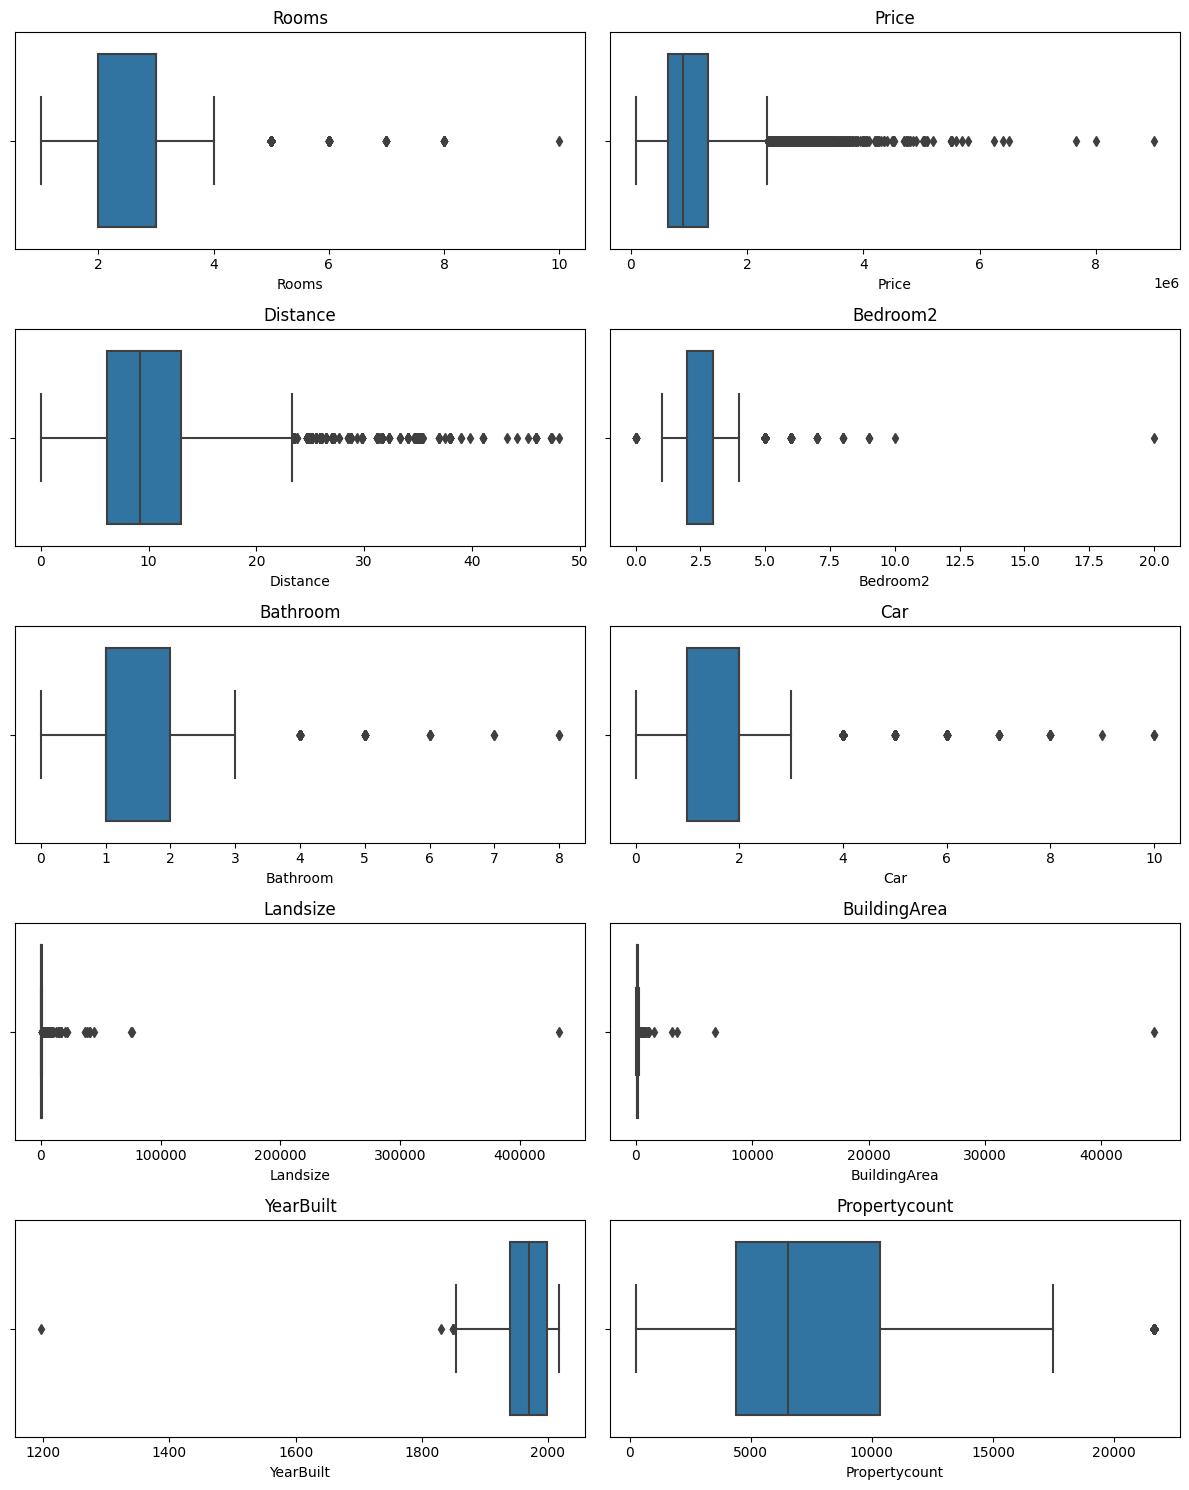

In [14]:
# Kutu Grafiği Çizelim
fig, axs = plt.subplots(len(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']) // 2, 2, figsize=(12, 15))

for i, column in enumerate(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']):
    row = i // 2
    col = i % 2
    sns.boxplot(x=housing[column], ax=axs[row, col])
    axs[row, col].set_title(column)
plt.tight_layout()
plt.show()

In [15]:
#Aykırı ve eksik olan numerik değişken değerlerine Z Skor yaklaşımı ile atama yapalım:
numeric_columns = housing.select_dtypes(include=['float', 'int64']).columns

for column in numeric_columns:

    max_value=(3*housing[column].std())+housing[column].mean()
    min_value=-(3*housing[column].std())+housing[column].mean()

    mean=housing.loc[(housing[column] > min_value) & (housing[column] < max_value), column].mean()

    if mean is not np.nan:
        housing.loc[(housing[column] < min_value) | (housing[column] > max_value), column] = mean
        housing[column].fillna(mean, inplace=True)
    else:
        housing[column].fillna(housing[column].mean(), inplace=True)

In [16]:
#Ondalıklı olan değişken değerlerinden integer tipinde olması gerekenleri yuvarlayalım.
round_columns = ['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Propertycount']
housing[round_columns] = housing[round_columns].round()

#Değişken tipini integer yapalım.
int_columns = ['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Propertycount']
for variable in int_columns:
    housing[variable] = housing[variable].astype('int64')

#Gereksiz kolonları çıkaralım.
columns_to_drop = ['Lattitude', 'Longtitude', 'Address', 'Postcode']
housing.drop(columns=columns_to_drop, inplace=True)

#Tekrar eden satırları çıkartıp indeksleri sıralayalım.
housing.drop_duplicates(inplace=True)
housing.reset_index(drop=True, inplace=True)

#PriceRange adında yeni bir değişken oluşturalım.
min_price = housing['Price'].min()
max_price = housing['Price'].max()

num_bins = 5  

housing['PriceRange'] = pd.cut(housing['Price'], bins=num_bins, precision=1)

# Exploratory Data Analysis

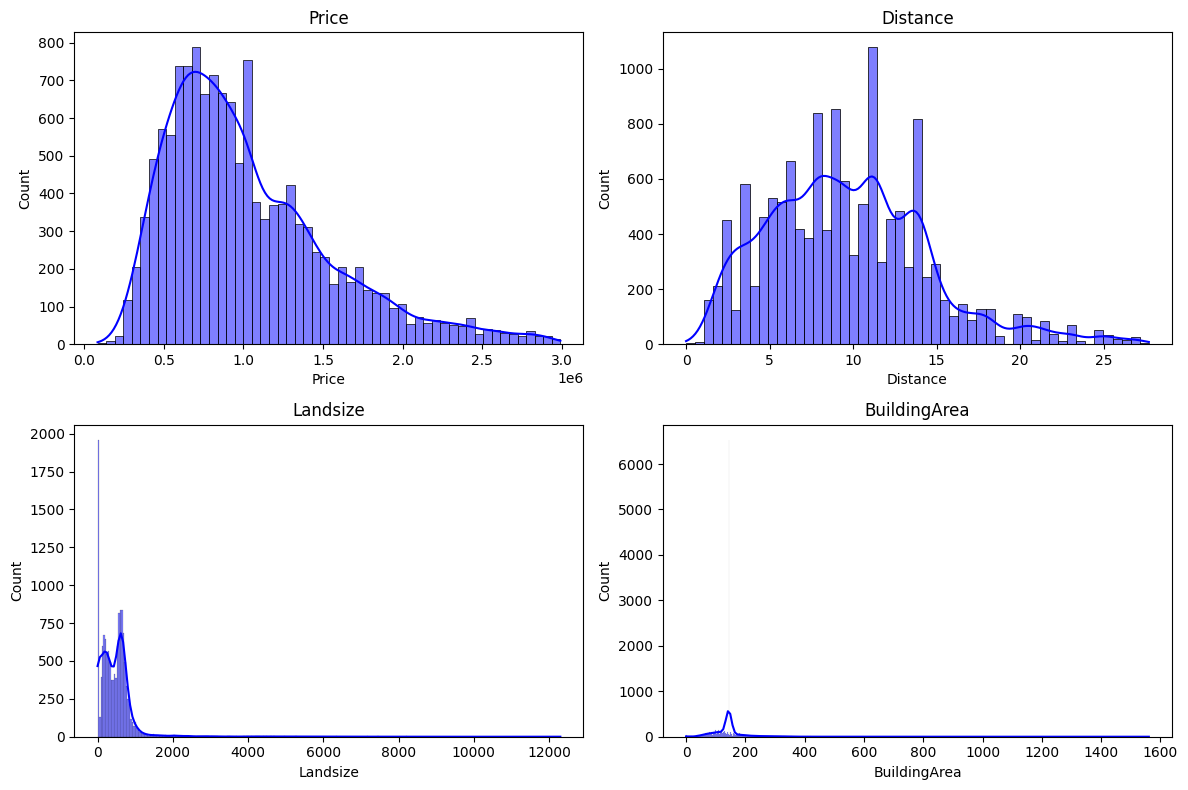

In [17]:
# Histogramlar
fig, axs = plt.subplots(len(['Price', 'Distance','Landsize', 'BuildingArea']) // 2, 2, figsize=(12, 8))
for i, column in enumerate(['Price', 'Distance','Landsize', 'BuildingArea']):
    row = i // 2
    col = i % 2
    sns.histplot(housing[column], kde=True, color='blue', bins='auto', ax=axs[row, col])
    axs[row, col].set_title(column)
plt.tight_layout()
plt.show()

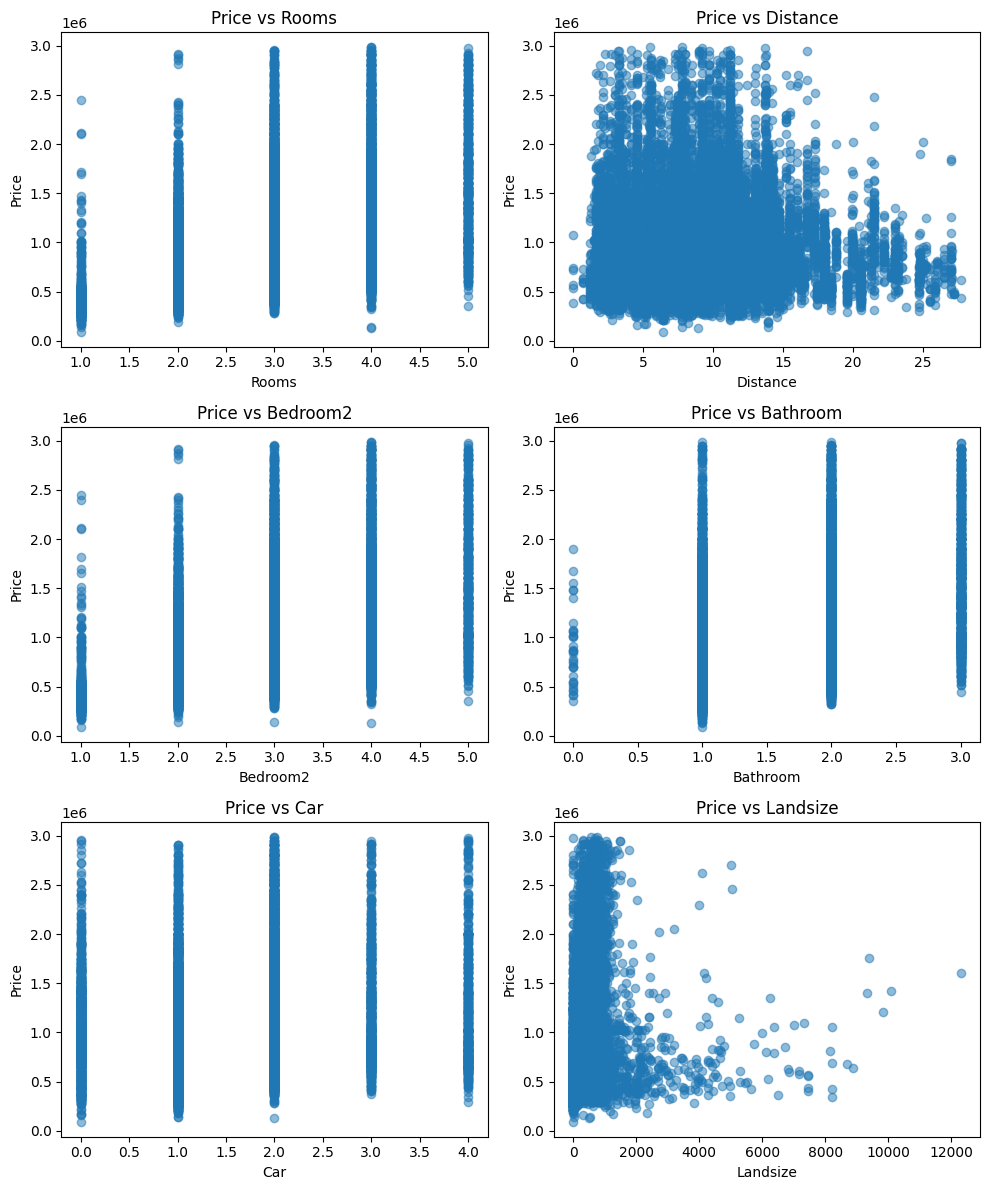

In [18]:
#Scatter Plots
independent_vars = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea','Propertycount']
dependent_var = 'Price'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

for i, ax in enumerate(axes.flatten()):
    x_var = independent_vars[i]
    ax.scatter(housing[x_var], housing[dependent_var], alpha=0.5)
    ax.set_title(f'{dependent_var} vs {x_var}')
    ax.set_xlabel(x_var)
    ax.set_ylabel(dependent_var)

plt.tight_layout()
plt.show()

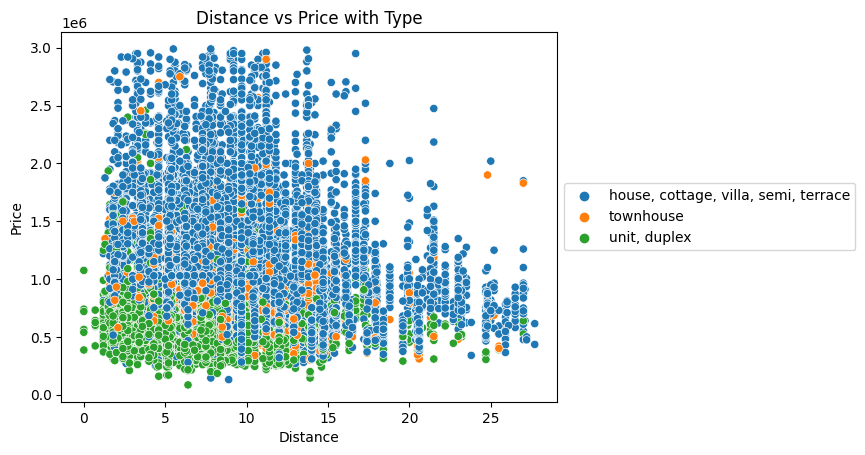

In [19]:
sns.scatterplot(x='Distance', y='Price', hue='Type', data=housing)
plt.title('Distance vs Price with Type')
plt.xlabel('Distance')
plt.ylabel('Price')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

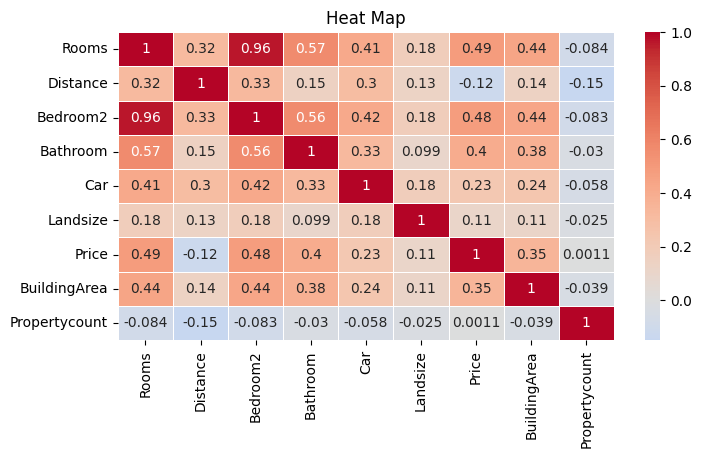

In [20]:
heat_map_data = housing[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','Price','BuildingArea','Propertycount']]

correlation_matrix = heat_map_data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heat Map")
plt.show()

/tmp/ipykernel_19/873787275.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=i, y='Price', hue='Year', data=housing, ci=None)


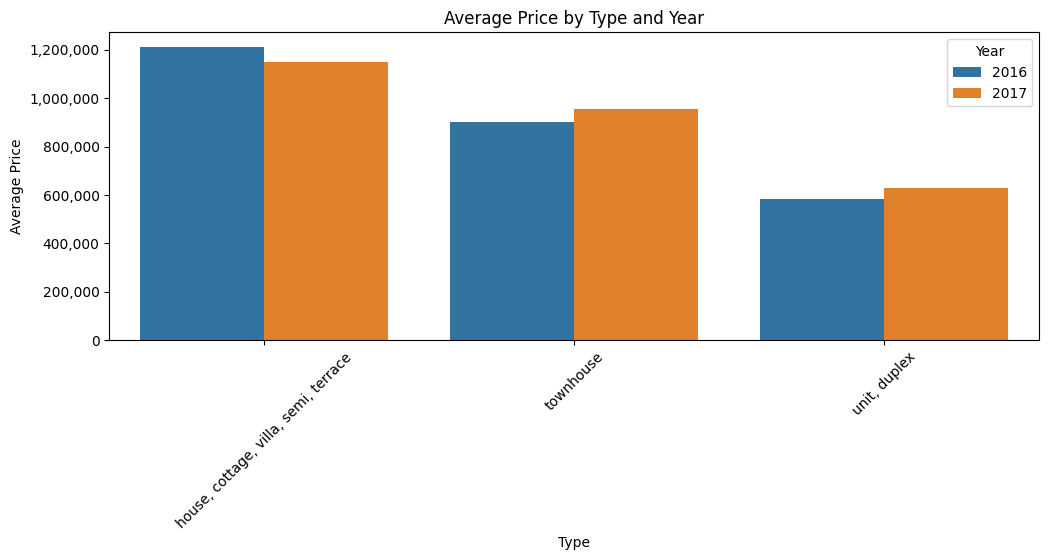

/tmp/ipykernel_19/873787275.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=i, y='Price', hue='Year', data=housing, ci=None)


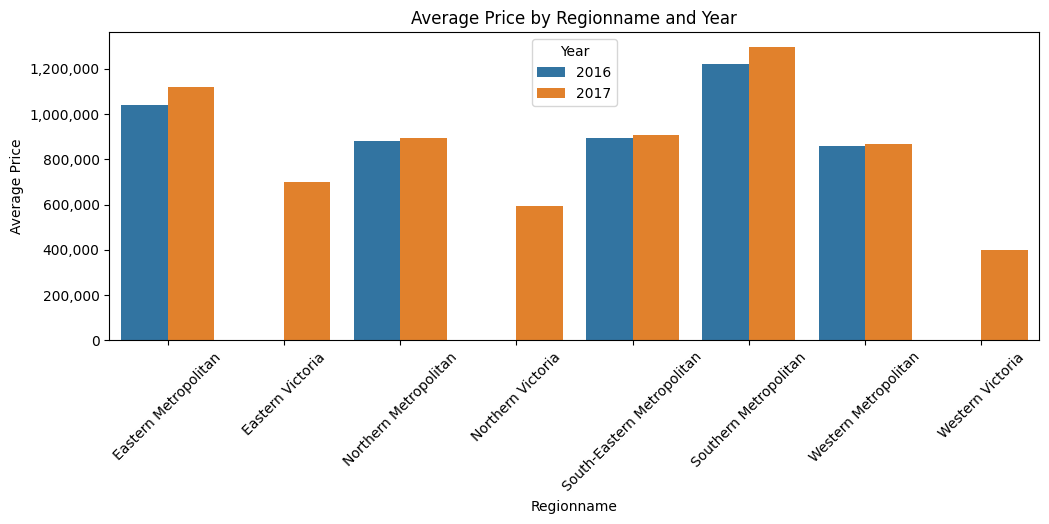

In [21]:
from matplotlib.ticker import FuncFormatter
categories = ['Type', 'Regionname']

for i in categories:
    plt.figure(figsize=(12, 4))
    ax = sns.barplot(x=i, y='Price', hue='Year', data=housing, ci=None)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

    plt.title('Average Price by {} and Year'.format(i))
    plt.xlabel(i)
    plt.ylabel('Average Price')
    plt.legend(title='Year')
    plt.xticks(rotation=45)
    plt.show()

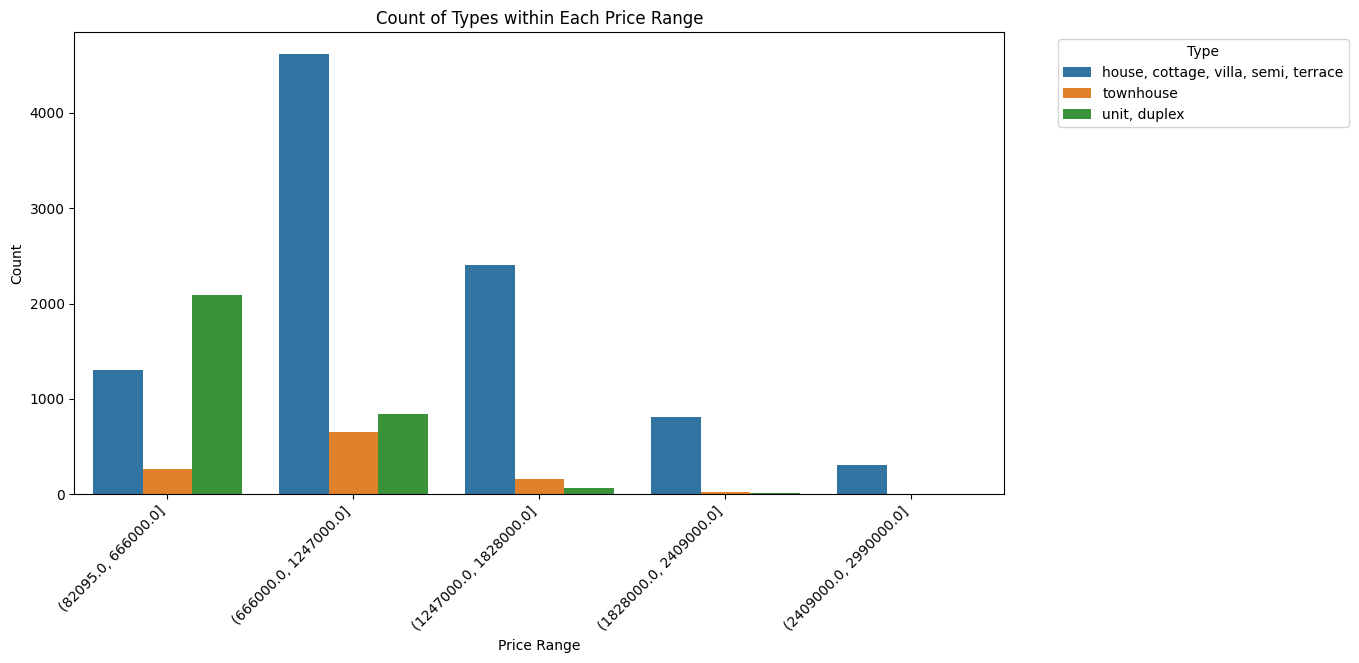

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='PriceRange', hue='Type', data=housing)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

ax.set_title('Count of Types within Each Price Range')
ax.set_xlabel('Price Range')
ax.set_ylabel('Count')
ax.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

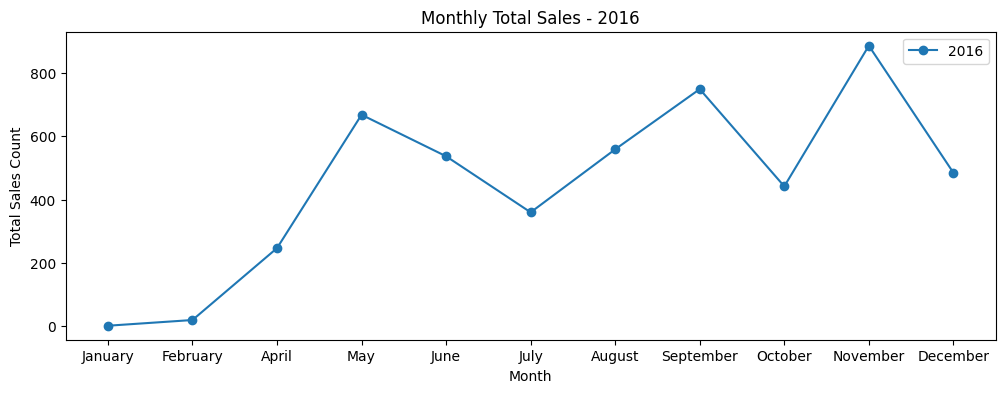

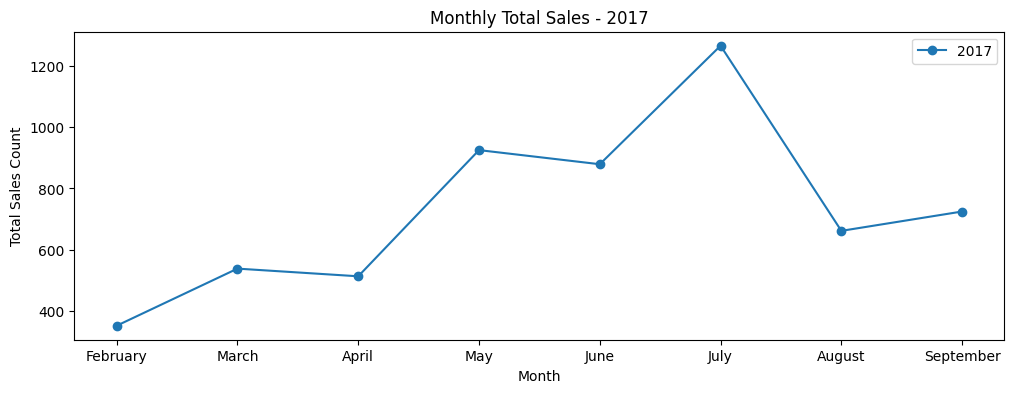

In [23]:
filtered_sales = housing[housing['Method'].isin(['property sold', 'property sold prior', 'sold after auction'])]

monthly_sales = filtered_sales.groupby(['Year', 'Month']).size().reset_index(name='Total Sales')

month_order =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

for year in [2016, 2017]:
    data_year = monthly_sales[monthly_sales['Year'] == year]

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(data_year['Month'], data_year['Total Sales'], marker='o', label=str(year), linestyle='-')

    ax.set_title(f'Monthly Total Sales - {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales Count')
    ax.legend()

    # Grafikleri gösterelim
    plt.show()

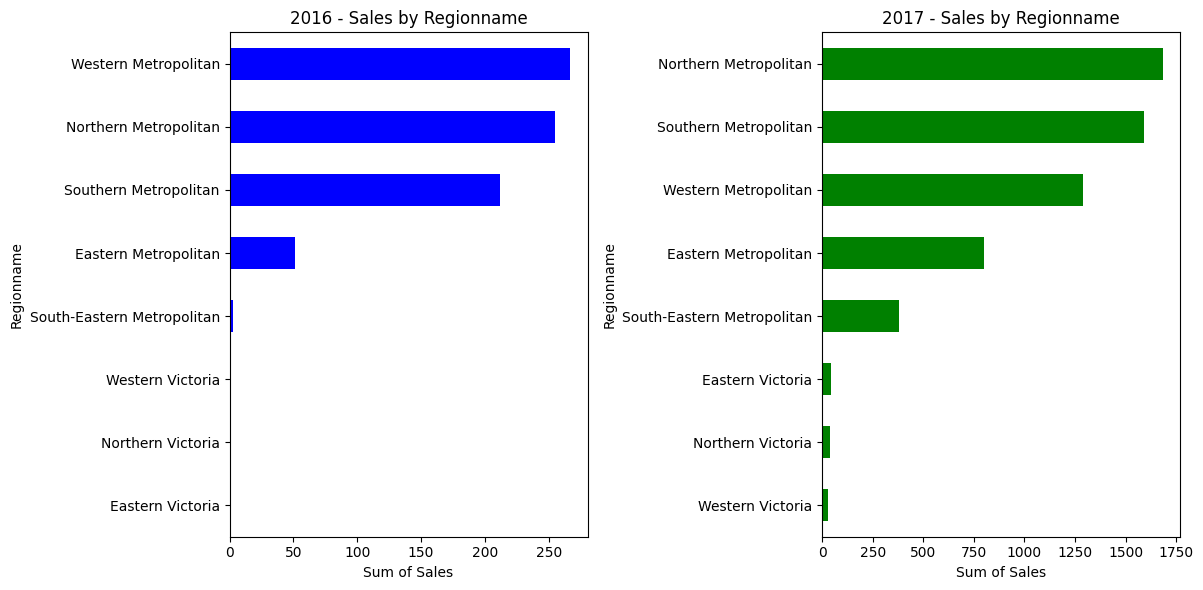

In [24]:
# 2016 ve 2017 yıllarına ait verileri filtreleyelim
housing_2016 = housing[housing['Year'] == 2016]
housing_2017 = housing[housing['Year'] == 2017]

# 'Method' koşullarını ekleyerek veriyi filtreleyelim
filtered_sales_2016 = housing_2016[housing_2016['Method'].isin(['property Sold', 'property sold prior', 'sold after auction'])]
filtered_sales_2017 = housing_2017[housing_2017['Method'].isin(['property sold', 'property sold prior', 'sold after auction'])]

# 2016 ve 2017 yılları için Regionname'lara göre satış adetlerini bulalım
sales_by_Regionname_2016=filtered_sales_2016['Regionname'].value_counts().sort_values(ascending=True)
sales_by_Regionname_2017 = filtered_sales_2017['Regionname'].value_counts().sort_values(ascending=True)

# Çubuk grafik oluşturalım
plt.figure(figsize=(12,6))

# 2016 yılı için
plt.subplot(1, 2, 1)
sales_by_Regionname_2016.plot(kind='barh', color='blue')
plt.title('2016 - Sales by Regionname')
plt.xlabel('Sum of Sales')
plt.ylabel('Regionname')

# 2017 yılı için
plt.subplot(1, 2, 2)
sales_by_Regionname_2017.plot(kind='barh', color='green')
plt.title('2017 - Sales by Regionname')
plt.xlabel('Sum of Sales')
plt.ylabel('Regionname')

plt.tight_layout()
plt.show()

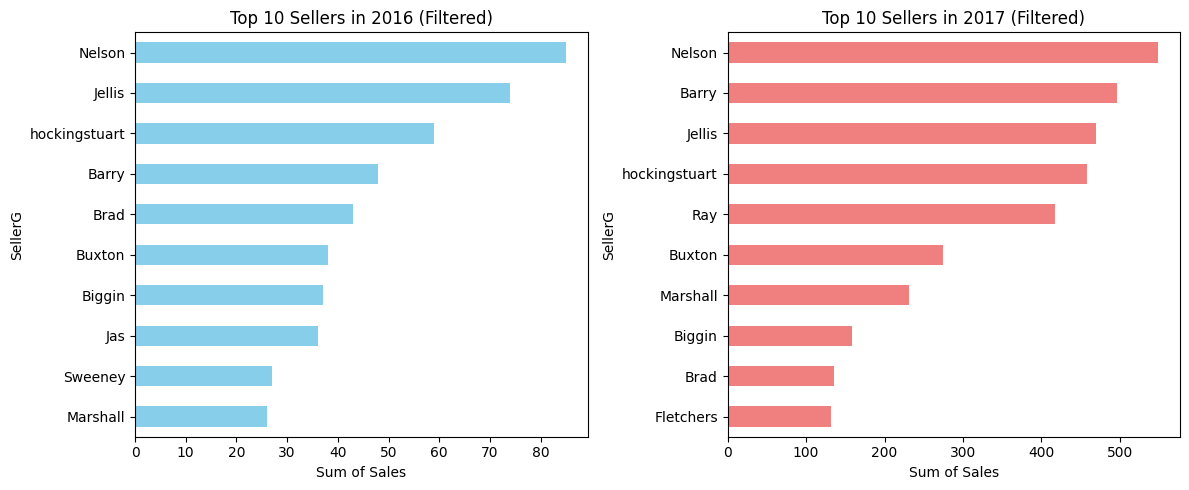

In [25]:
# 2016 yılında en çok satış yapan ilk 10 SellerG'yi bulalım
top_sellers_2016 = filtered_sales_2016['SellerG'].value_counts().head(10)

# 2017 yılında en çok satış yapan ilk 10 SellerG'yi bulalım
top_sellers_2017 = filtered_sales_2017['SellerG'].value_counts().head(10)

# Çubuk grafiklerle görselleştirme
plt.figure(figsize=(12, 5))

# 2016 yılı için çubuk grafik
plt.subplot(1, 2, 1)
top_sellers_2016.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Sellers in 2016 (Filtered)')
plt.xlabel('Sum of Sales')



# 2017 yılı için çubuk grafik
plt.subplot(1, 2, 2)
top_sellers_2017.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Top 10 Sellers in 2017 (Filtered)')
plt.xlabel('Sum of Sales')

plt.tight_layout()
plt.show()

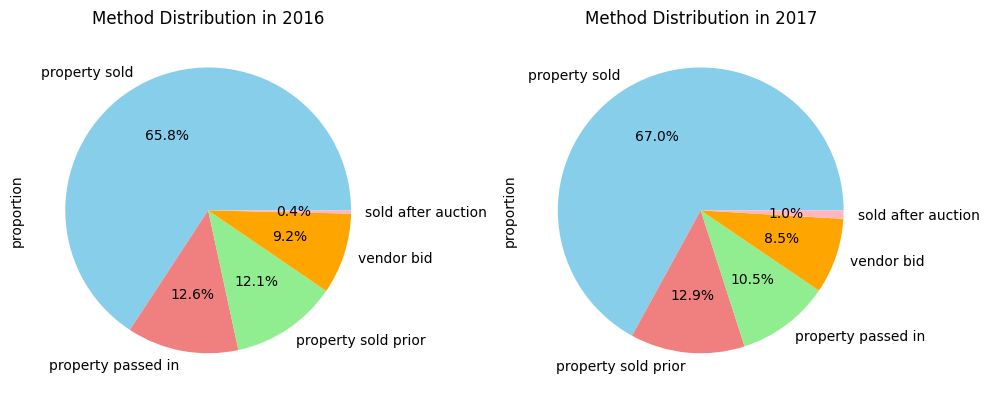

In [26]:
# 'Year' sütununa göre filtreleme yapalım
sales_2016 = housing[housing['Year'] == 2016]
sales_2017 = housing[housing['Year'] == 2017]

# 'Method' dağılımını bulalım
method_distribution_2016 = sales_2016['Method'].value_counts(normalize=True) * 100
method_distribution_2017 = sales_2017['Method'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
method_distribution_2016.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink'])
plt.title('Method Distribution in 2016')

plt.subplot(1, 2, 2)
method_distribution_2017.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink'])
plt.title('Method Distribution in 2017')

plt.tight_layout()
plt.show()

/tmp/ipykernel_19/1619634889.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='SellerG', y='MethodCount', hue='Method', data=top_sellers_data, ci=None, order=order)


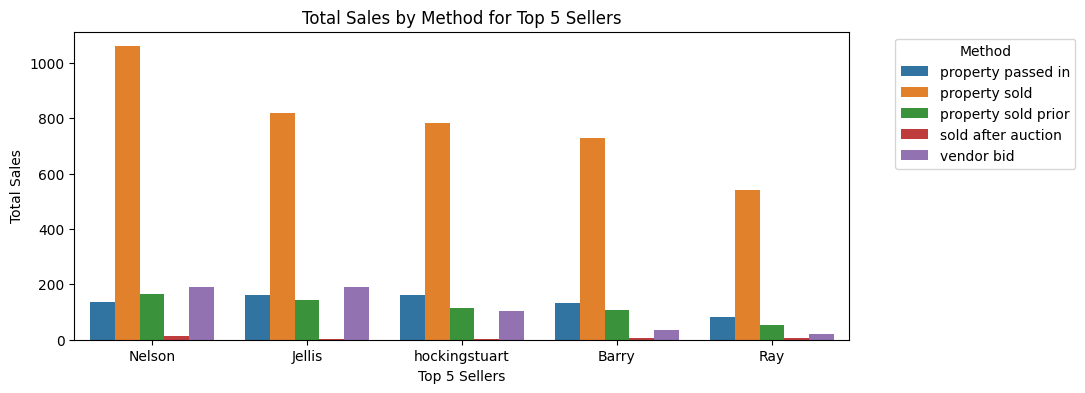

In [27]:
sales_count = housing.groupby(['SellerG', 'Method']).size().reset_index(name='MethodCount')
top_sellers = sales_count.groupby('SellerG')['MethodCount'].sum().nlargest(5).index

top_sellers_data = sales_count[sales_count['SellerG'].isin(top_sellers)]

order=top_sellers_data.groupby('SellerG')['MethodCount'].sum().sort_values(ascending=False).index
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='SellerG', y='MethodCount', hue='Method', data=top_sellers_data, ci=None, order=order)

ax.set_title('Total Sales by Method for Top 5 Sellers')
ax.set_xlabel('Top 5 Sellers')
ax.set_ylabel('Total Sales')
ax.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()